## Data Cleaning and Preprocessing Notebook

This notebook is to be strictly used for data cleaning and preprocessing purposes. Steps:

1. Read the dataset
2. Handle Missing Values (if any).
3. Do visualizations as required
4. Explore your data here
5. Save the cleaned and processed dataset as `data/final_dataset.csv`.

NO MODELLING WILL BE DONE IN THIS NOTEBOOK!

## Importing and Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/data.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## Exploratory data analysis and Feature Engineering

In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Converting "Date" column to numeric form for relevance.

In [4]:
d = []
m = []
y = []

for i in df['Date']:
    dmy = i.split('-')
    d.append(int(dmy[0]))
    m.append(int(dmy[1]))
    y.append(int(dmy[2]))
    
df['Day'] = d
df['Month'] = m
df['Year'] = y

df.drop(columns=['Date'], inplace=True)

<AxesSubplot:>

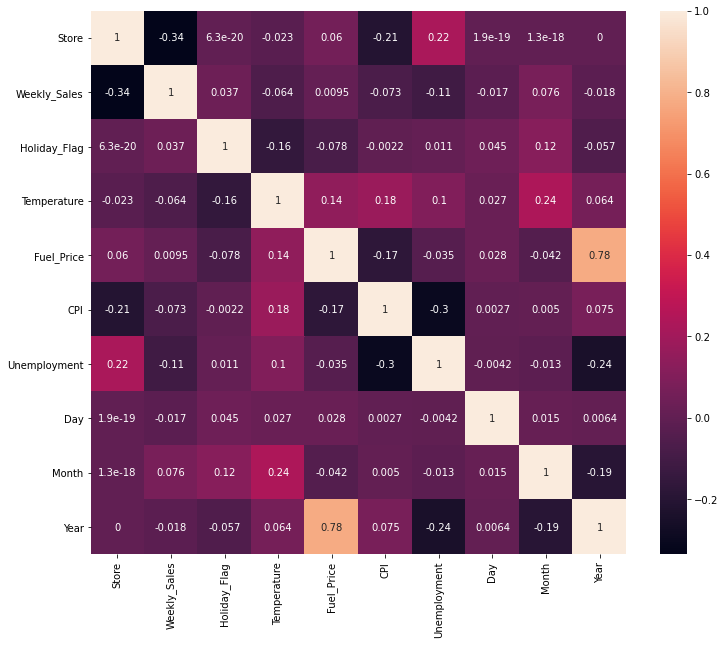

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

There isn't much of a correlation between the weekly sales and other columns. So, we cannot eliminate any.

### One-hot encoding of store column

In [6]:
df = df.join(pd.get_dummies(df['Store'], prefix='Store')).drop(columns='Store')
df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Store_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,1,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012,0,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012,0,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012,0,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
mms = MinMaxScaler()
x = mms.fit_transform(df.drop(columns=['Weekly_Sales']))
y = df['Weekly_Sales']

In [8]:
final_df = pd.DataFrame()

In [9]:
final_df['Weekly Sales'] = y
final_df[df.drop(columns=['Weekly_Sales']).columns] = x
final_df

,Weekly Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Store_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,0.0,0.434149,0.050100,0.840500,0.405118,0.133333,0.090909,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1641957.44,1.0,0.396967,0.038076,0.841941,0.405118,0.366667,0.090909,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1611968.17,0.0,0.410861,0.021042,0.842405,0.405118,0.600000,0.090909,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1409727.59,0.0,0.476419,0.044589,0.842707,0.405118,0.833333,0.090909,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1554806.68,0.0,0.475147,0.076653,0.843008,0.405118,0.133333,0.181818,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0.0,0.654990,0.764028,0.651876,0.460514,0.900000,0.727273,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6431,733455.07,0.0,0.655088,0.758016,0.653427,0.458884,0.133333,0.818182,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6432,734464.36,0.0,0.553131,0.765531,0.654977,0.458884,0.366667,0.818182,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6433,718125.53,0.0,0.572701,0.750000,0.655013,0.458884,0.600000,0.818182,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
final_df.to_csv('../data/final_dataset.csv', index=False)